### Codigo para generar valores en X, hacer un histograma y despues una curva con los datos del histograma

In [34]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
import numpy as np

In [35]:
Data = np.random.RandomState(10000) #ADUs
yData = Data.randn(10000) #lista con valores distribuidos de manera normal

In [36]:
type(Data)

numpy.random.mtrand.RandomState

In [37]:
yData #valores de los pixeles contenidos en un arreglo de 10 x 10

array([-1.27109064,  0.17613707, -0.29621638, ...,  0.66019026,
        0.53913786,  0.91287497])

In [38]:
yData.size

10000

In [39]:
xData=np.arange(0,10000)

In [40]:
xData #pixeles de un arreglo 100 x 100

array([   0,    1,    2, ..., 9997, 9998, 9999])

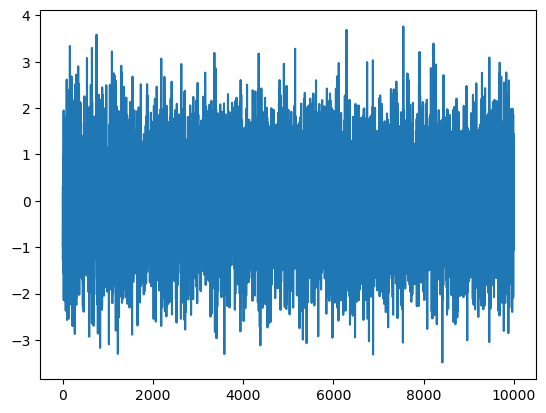

In [41]:
plt.plot(xData, yData)

In [42]:
### Creacion del histograma

In [43]:
bins=np.histogram_bin_edges(yData, bins='fd')

In [44]:
bins.size

60

In [45]:
data_histo, bins = np.histogram(yData,bins=bins)        #np.histogram genera los datos en data_histo y los bins

In [46]:
len(data_histo) # data_histo[0]: frecuencia u ocurrencia; data_histo[1]: bins)

59

In [47]:
bins

array([-3.4832135 , -3.36045795, -3.23770241, -3.11494687, -2.99219132,
       -2.86943578, -2.74668024, -2.62392469, -2.50116915, -2.37841361,
       -2.25565806, -2.13290252, -2.01014697, -1.88739143, -1.76463589,
       -1.64188034, -1.5191248 , -1.39636926, -1.27361371, -1.15085817,
       -1.02810263, -0.90534708, -0.78259154, -0.65983599, -0.53708045,
       -0.41432491, -0.29156936, -0.16881382, -0.04605828,  0.07669727,
        0.19945281,  0.32220835,  0.4449639 ,  0.56771944,  0.69047499,
        0.81323053,  0.93598607,  1.05874162,  1.18149716,  1.3042527 ,
        1.42700825,  1.54976379,  1.67251933,  1.79527488,  1.91803042,
        2.04078597,  2.16354151,  2.28629705,  2.4090526 ,  2.53180814,
        2.65456368,  2.77731923,  2.90007477,  3.02283031,  3.14558586,
        3.2683414 ,  3.39109695,  3.51385249,  3.63660803,  3.75936358])

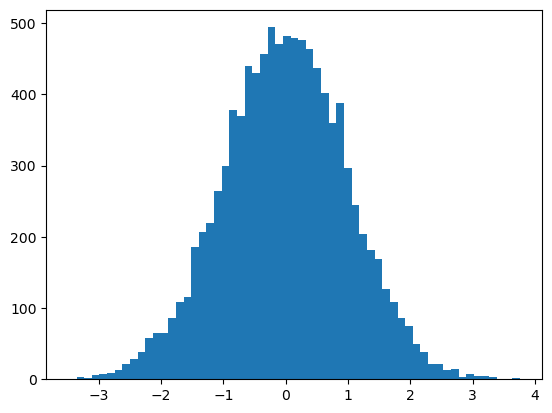

In [48]:
histograma=plt.hist(yData, bins=bins)# #plt.hist genera los datos del histograma, guarda los "datos,bins" y hace un plot

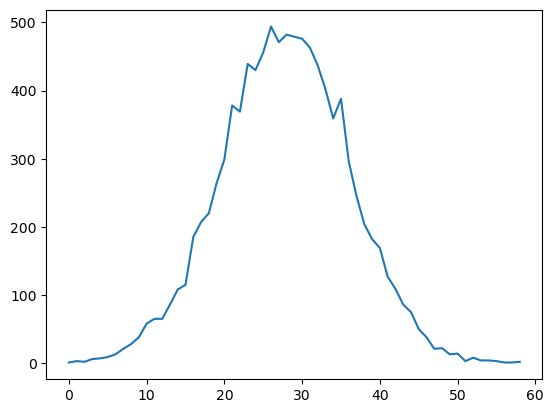

In [49]:
plt.plot(histograma[0]) #datos del histograma

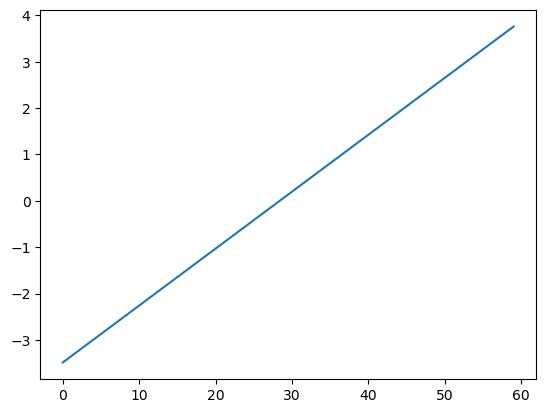

In [50]:
plt.plot(histograma[1]) #bins del histograma

#### Ajustar una curva 

In [29]:
print('Para ajustar una curva es necesario que ambos ejes sean del mismo tamaño\nsize datos= '+str(histograma[0].size)+'\n'+'size bins= '+str(histograma[1].size))

Para ajustar una curva es necesario que ambos ejes sean del mismo tamaño
size datos= 59
size bins= 60


In [30]:
print('max=  '+str(histograma[1].max()))
print('min= '+str(histograma[1].min()))
print('size= '+str(histograma[1].size))

max=  3.7593635764838433
min= -3.4832134981417675
size= 60


In [31]:
x=np.linspace(histograma[1].min(), histograma[1].max(), histograma[1].size)

In [32]:
x.size


60

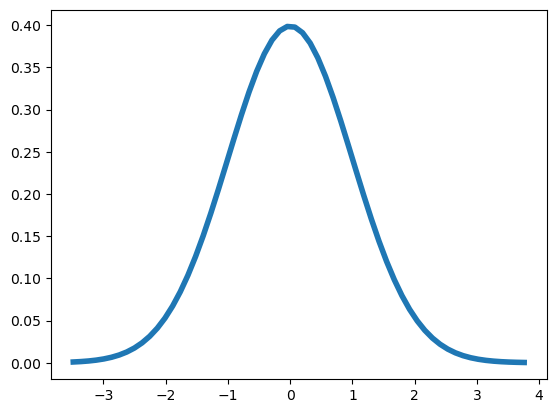

In [33]:
plt.plot(x, 1 / np.sqrt(2*np.pi) * np.exp(-(x**2)/2), linewidth=4)

#### A pesar de que la curva ajusta a los datos, es necesario que la curva se genere a partir del histograma

## Combinar plots

In [25]:
yData #Valores de los pixeles en ADUs

array([-1.27109064,  0.17613707, -0.29621638, ...,  0.66019026,
        0.53913786,  0.91287497])

In [26]:
mu, std = norm.fit(yData)  #generar valores de la curva gaussiana

In [27]:
bins=np.histogram_bin_edges(yData, bins='fd')

In [28]:
data_histo, bins = np.histogram(yData,bins=bins)

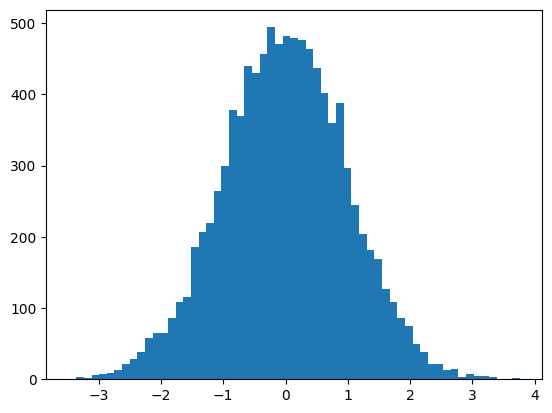

In [41]:
histograma=plt.hist(yData, bins) #, density=True) #, alpha=0.6, color='b') #Nuevamente: Generar solo histograma

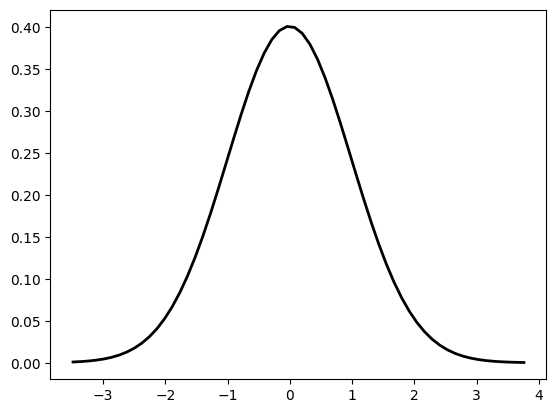

In [30]:
x=np.linspace(histograma[1].min(), histograma[1].max(), histograma[1].size) #Valores en x a partir del histograma
y = norm.pdf(x, mu, std) # generar valores de y, como la probabilidad de x
plt.plot(x, y, 'k', linewidth=2)

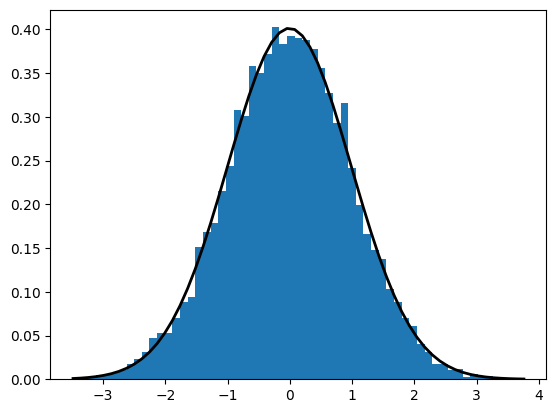

In [35]:
mu, std = norm.fit(yData) #1
histograma=plt.hist(yData, bins, density=True)#, alpha=0.6, color='b') #2
x=np.linspace(histograma[1].min(), histograma[1].max(), histograma[1].size) #3
y = norm.pdf(x, mu, std)    #4 
plt.plot(x, y, 'k', linewidth=2) #5

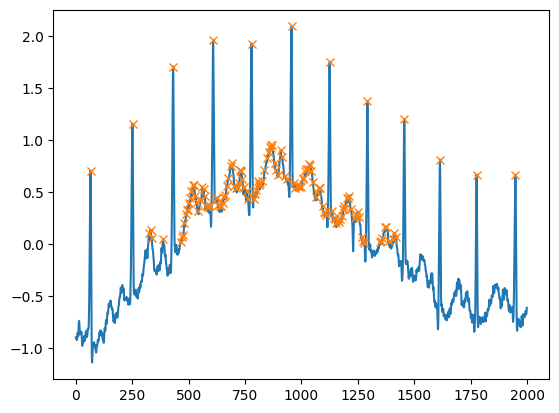

In [45]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

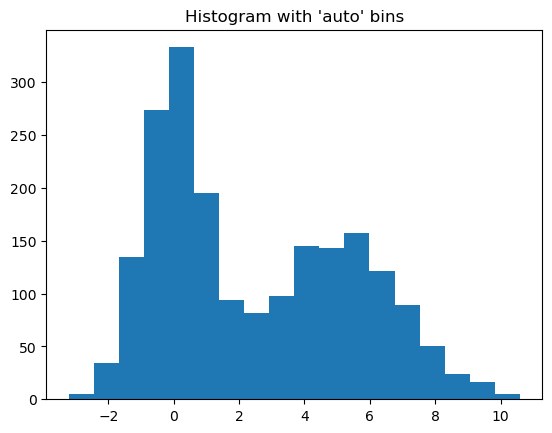

In [33]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()

In [34]:
a

array([ 1.3315865 ,  0.71527897, -1.54540029, ...,  5.74446677,
        6.22449239,  8.42055014])

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file='/home/oem/datosFits/testMITLL/spuriousCharge/15FEB23/proc_skp_module24_MITLL01_externalVr-4_Vv2_T140__NSAMP324_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img79.fits'
#file='/home/oem/datosFits/testMITLL/01DIC22/proc_skp_module24_MITLL01_externalVr-4_Vtest_T170_testLeakage_vtest_vdd-22__NSAMP1_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img14.fits'
imagen=fits.open(file)
datosCCD=imagen[0].data

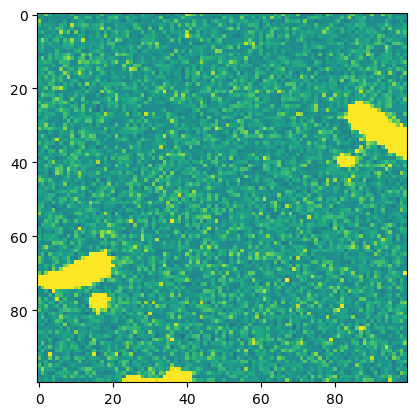

In [25]:
plt.imshow(datosCCD[400:500,400:500], vmin=-1000,vmax=1000)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 3., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 2., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        [2., 0., 1., ..., 1., 0., 0.]]),
 array([-216.60968 , -181.20137 , -145.79305 , -110.38473 ,  -74.97641 ,
         -39.568096,   -4.15978 ,   31.248537,   66.65685 ,  102.06517 ,
         137.47348 ,  172.8818  ,  208.29012 ,  243.69844 ,  279.10675 ,
         314.51508 ,  349.9234  ,  385.3317  ,  420.74002 ,  456.14835 ,
         491.55664 ,  526.96497 ,  562.3733  ,  597.7816  ,  633.18994 ,
         668.59827 ,  704.00653 ,  739.41486 ,  774.8232  ,  810.2315  ,
         845.63983 ,  881.04816 ,  916.4565  ,  951.86475 ,  987.2731  ,
        1022.6814  , 1058.0897  ], dtype=float32),
 <a list of 50 BarContainer objects>)

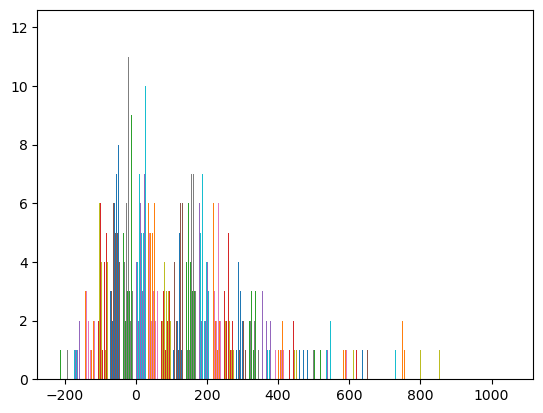

In [32]:
datosCCD

In [ ]:
plt.hist(datosCCD.flatten(), bins='auto')

In [1]:
import numpy as np
import numpy.ma as ma

In [2]:
col=np.array([1,2,3,4,5,1,2,3,4,5,3,2,1])

In [3]:
np.median(col, axis=0)

3.0

In [4]:
mask=[True, False,True, False,True, False,True, False,True, False,True, False,True]

In [5]:
col_masked=ma.masked_array(col,mask=mask)
col_masked

masked_array(data=[--, 2, --, 4, --, 1, --, 3, --, 5, --, 2, --],
             mask=[ True, False,  True, False,  True, False,  True, False,
                    True, False,  True, False,  True],
       fill_value=999999)

In [10]:
ma.median(col_masked, axis=0)

2.5

In [8]:
col_masked

masked_array(data=[--, 2, --, 4, --, 1, --, 3, --, 5, --, 2, --],
             mask=[ True, False,  True, False,  True, False,  True, False,
                    True, False,  True, False,  True],
       fill_value=999999)